# Modeling & Fitting

In [1]:
import os
import sys
sys.path.insert(0, "../../")

import mpld3
mpld3.enable_notebook()

import warnings
warnings.filterwarnings('ignore')

from core import util, config, database
from core.data.model import ModelDataRepo
from core.data.model.entities import *

database.init()
config.init_plot()

### Get Data

In [2]:
selected_kabko = "KOTA BLITAR"
kabko = ModelDataRepo.get_kabko_full(selected_kabko)

In [3]:
kabko._kapasitas_rs

[(0, 10), (70, 11)]

### Make Model

In [4]:
from core.modeling import SeicrdRlcModel

mod = SeicrdRlcModel(kabko)

### Select Datsets to Use for Fitting

In [5]:
used_datasets = [
    #"infectious", 
    "critical_cared", 
    "infectious_all", 
    "recovered", 
    "dead",
    #"infected"
]
mod.use_datasets(used_datasets)

### List Variables that Can be Fitted

In [6]:
varying_init = [
    "death_rate_over",
    "exposed_rate_over", 
    "kapasitas_rs_mul", 
    "test_coverage_max", 
    "test_coverage_0", "test_coverage_increase", 
    "infectious_rate", 
    "critical_rate", "critical_chance",
    "death_rate_normal", "death_chance_normal", 
    "k", "r_0", "r_1", "r_2"
]

### Select Variables to Fit

In [7]:
varying_now = [
    #"death_rate_over",
    #"exposed_rate_over", 
    #"kapasitas_rs_mul", 
    #"test_coverage_max", 
    #"test_coverage_0", "test_coverage_increase", 
    "infectious_rate", 
    "critical_rate", "critical_chance",
    "death_rate_normal", "death_chance_normal", 
    "k", "r_0", "r_1", "r_2"
]
unvary = [x for x in varying_init if x not in varying_now]

### Fit!

In [8]:
result = mod.fit(test_splits=[5], unvary=unvary)
result

### Fit Results

Params Should Have "standard error" and "relative error" Columns. If they dont:
1. A parameter might not be significant
2. A parameter has hit its min/max limit and can't vary

In [9]:
result.fit_result.params

name,value,initial value,min,max,vary
days,128.000000,128,-inf,inf,False
population,142798.000,142798,-inf,inf,False
infectious_rate,0.07165109,0.10975260222904294,0.07142857,0.33333333,True
critical_chance,0.26866580,0.21988199939600145,0.01000000,0.66666667,True
critical_rate,0.14285714,0.14285714285714285,0.08333333,0.14285714,True
recovery_rate_normal,0.11111111,0.1111111111111111,-inf,inf,False
recovery_rate_critical,0.15384615,0.15384615384615385,0.05384615,0.15384615,True
death_chance_normal,0.24968934,0.13255584168359763,0.00500000,0.25000000,True
death_rate_normal,0.14460904,0.10000000005838192,0.10000000,0.20000000,True
death_chance_over,1.00000000,1.0,-inf,inf,False


### Model Scores

In [10]:
import math

In [11]:
data = [
    [1,2,5,6,2,3,4],
    [1,2,4,1,4,2,2],
    [1,2,4,5,2,4,7]
]
util.np_mean_2d(data)

array([3.28571429, 2.28571429, 3.57142857])

In [12]:
print("Last fit scores")
result.fit_scorer.report()
print()

Last fit scores
Varying Parameters: 7
Residual Mean (~0): [ 0.93291393  0.94060055 -0.91993362 -0.3148808 ]
Residual Median (~0): [ 0.56327547  0.02774959 -0.8841848  -0.22148726]
Max Error (~0): [ 6.65416797 13.88184799  3.41646357  1.27064448]
MAE (~0): [1.0388699  1.21859899 1.09042407 0.35840456]
MSE (~0): [2.61537067 7.57521763 1.98659146 0.24244553]
RMSE (~0): [1.61721077 2.75231133 1.40946495 0.49238759]
RMSLE (~0): [0.53124786 0.43882812 0.3250978  0.35051869]
Explained Variance: [0.36134267 0.38253359 0.85344908 0.58195239]
R2 (~1): [0.04281652 0.30088175 0.74468706 0.29269451]
Adjusted R2 (~1): [-0.01301919  0.26009985  0.72979381  0.25143502]
SMAPE (~0): [0.72475706 0.55775485 0.34614847 0.87302771]
MASE (~0): [0.98521378 0.98205988 1.0714276  1.01421434]
Chi Square: [334.76744541043126, 969.6278571646478, 254.28370654730068, 31.033028374056215]
Reduced Chi Square: [2.7666731025655475, 8.013453364997089, 2.1015182359281046, 0.25647130887649766]
AIC: [137.05994675678363, 273.

In [13]:
print("Last fit scores flat")
result.fit_scorer.flatten().report()
print()

Last fit scores flat
Varying Parameters: 7
Residual Mean (~0): [0.15967501]
Residual Median (~0): [-0.10294722]
Max Error (~0): [13.88184799]
MAE (~0): [0.92657438]
MSE (~0): [3.10490632]
RMSE (~0): [1.76207444]
RMSLE (~0): [0.41932873]
Explained Variance: [0.498188]
R2 (~1): [0.49403322]
Adjusted R2 (~1): [0.48700591]
SMAPE (~0): [0.62542202]
MASE (~0): [0.98521378]
Chi Square: [1589.712037496436]
Reduced Chi Square: [3.147944628705814]
AIC: [594.0875751832773]
AICc: [594.3097974054995]
BIC: [623.7558475585538]
Durbin-Watson: [0.19222083]
Residual Normal Test Shapiro p (p>a): [1.18011598e-29]
Residual Runs Test p (p>0.5): [6.61725028e-99]
F-Test Overall Significance p (p<a): [0.09685538]
F-Test pred-data p (p>a): [0.27351673]
F-Test residual-zero p (p>a): [0.03994901]
KS-Test pred-data p (p>a): [1.78257969e-46]
KS-Test residual-normal p (p>a): [2.89323269e-11]
Prediction Interval p (p<a): [0.9921875]



In [14]:
if result.test_scorer:
    print("Test scores")
    result.test_scorer.report()
    print()

Test scores
Varying Parameters: 7
Residual Mean (~0): [1.50478134 2.07244896 1.14594527 0.181408  ]
Residual Median (~0): [ 0.92224541  0.75237711  0.29602364 -0.07764595]
Max Error (~0): [ 7.89688214 16.75240128  9.87059392  1.85537227]
MAE (~0): [1.61676607 2.28630524 1.50794027 0.30420827]
MSE (~0): [ 5.2577716  16.82362857  6.42078292  0.4063922 ]
RMSE (~0): [2.29298312 4.10166168 2.53392638 0.63748898]
RMSLE (~0): [0.92429805 1.01016395 0.4352116  0.34593705]
Explained Variance: [-0.02542528 -0.01195374  0.36381583  0.07799959]
R2 (~1): [-0.80111024 -0.35887136  0.20024932 -0.00324094]
Adjusted R2 (~1): [-0.93108727 -0.45693424  0.14253535 -0.07563977]
SMAPE (~0): [0.92745565 0.836297   0.23952223 0.97122948]
MASE (~0): [1.00245232 1.00161518 0.9553268  1.02449031]
Chi Square: [552.0660179596525, 1766.4809999846564, 674.1822064943759, 42.671181317027056]
Reduced Chi Square: [5.6333267138740055, 18.025316326374046, 6.879410270350775, 0.43542021752068427]
AIC: [188.26926510573907, 3

In [15]:
if result.test_scorer:
    print("Test scores flat")
    result.test_scorer.flatten().report()
    print()

Test scores flat
Varying Parameters: 7
Residual Mean (~0): [1.22614589]
Residual Median (~0): [0.37300686]
Max Error (~0): [16.75240128]
MAE (~0): [1.42880496]
MSE (~0): [7.22714382]
RMSE (~0): [2.68833477]
RMSLE (~0): [0.738891]
Explained Variance: [0.1775046]
R2 (~1): [-0.03853838]
Adjusted R2 (~1): [-0.05618345]
SMAPE (~0): [0.74362609]
MASE (~0): [1.00173277]
Chi Square: [3035.400405755712]
Reduced Chi Square: [7.349637786333443]
AIC: [844.6944434276882]
AICc: [844.9662880878823]
BIC: [872.9762264066301]
Durbin-Watson: [0.16023316]
Residual Normal Test Shapiro p (p>a): [5.75094141e-28]
Residual Runs Test p (p>0.5): [8.46534193e-86]
F-Test Overall Significance p (p<a): [3.50119336e-07]
F-Test pred-data p (p>a): [7.45856508e-19]
F-Test residual-zero p (p>a): [2.81453523e-24]
KS-Test pred-data p (p>a): [5.40772947e-35]
KS-Test residual-normal p (p>a): [5.78175952e-31]
Prediction Interval p (p<a): [0.8]



### Predict

In [16]:
values = dict(result.fit_result.values)
values["days"] += 30
values["days"]

158

In [17]:
model_result = mod.model(**values)

### Plot!

In [18]:
from core.modeling import ModelPlotter

plotter = ModelPlotter(model_result)

In [19]:
length = kabko.data_count + result.outbreak_shift
length

128

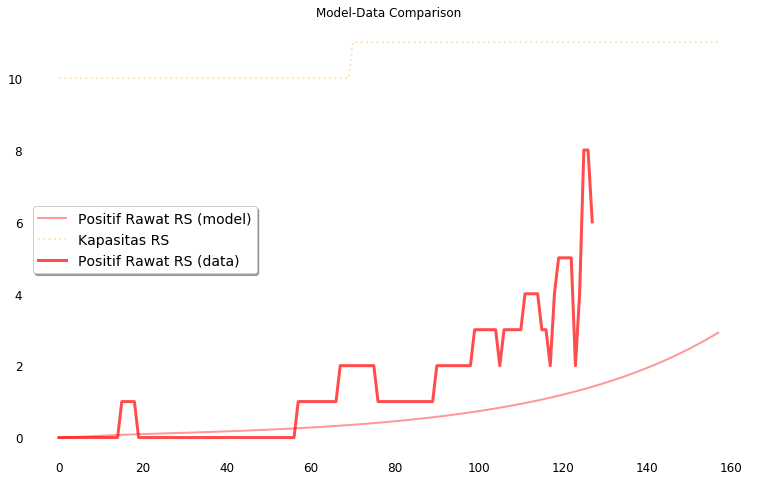

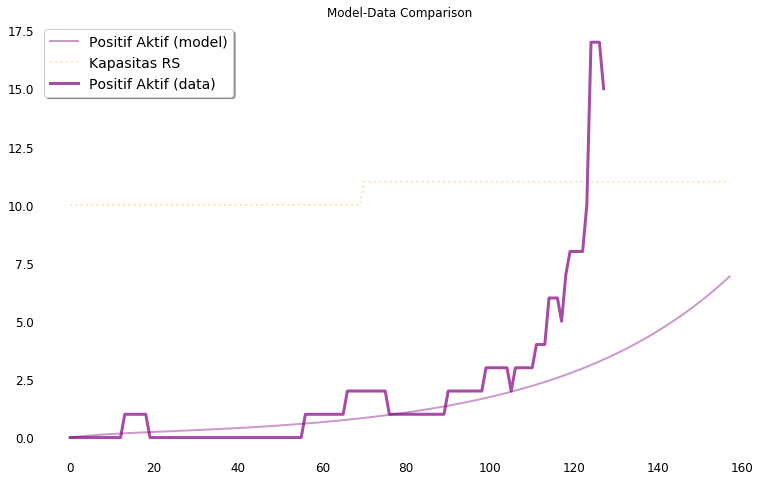

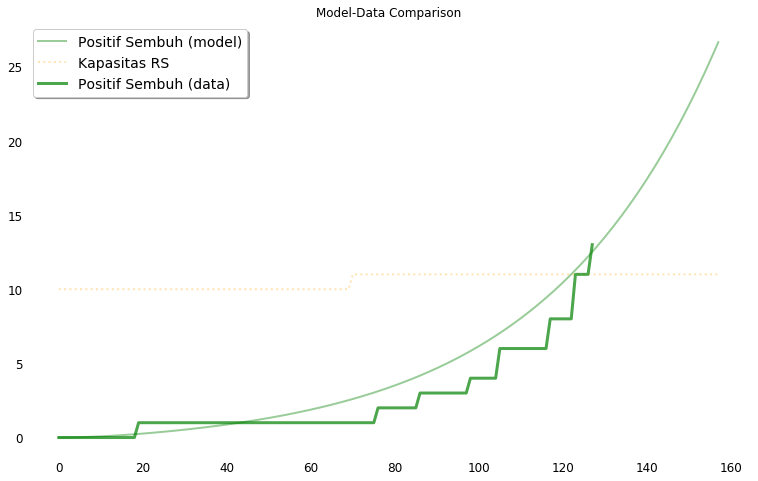

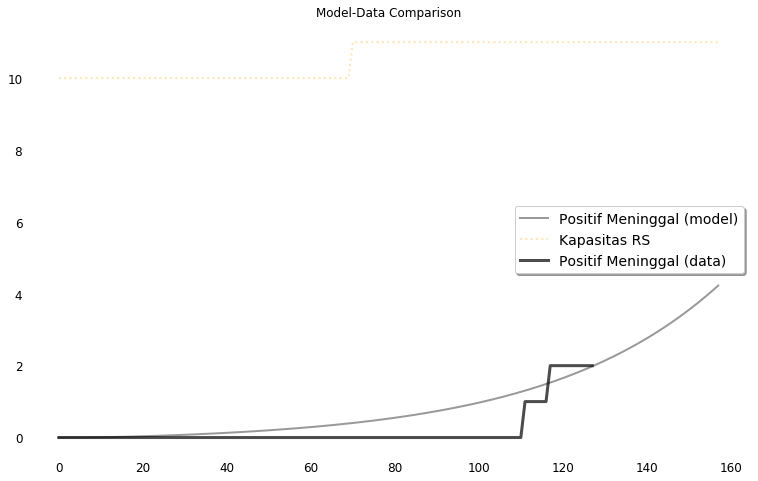

In [20]:
import matplotlib.pyplot as plt
for d in used_datasets:
    datasets = kabko.get_datasets([d], result.outbreak_shift)
    plotter.plot(
        plotter.plot_main_data, 
        datasets,
        length
    )
    plt.show()

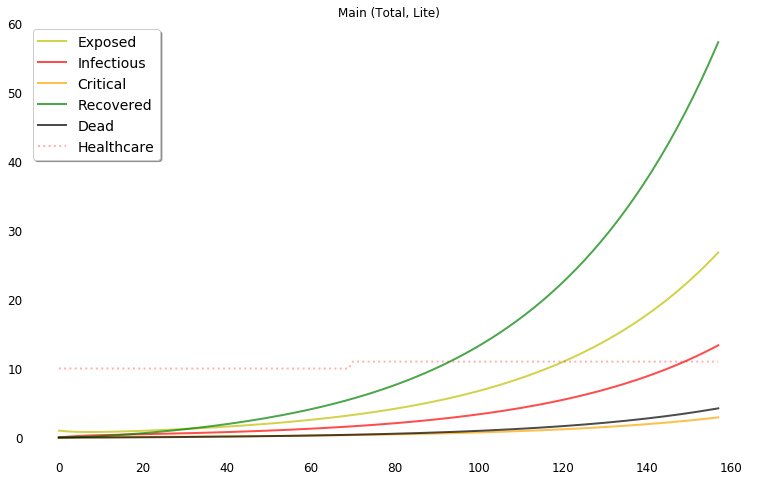

In [21]:
plotter.plot(plotter.plot_main_lite);

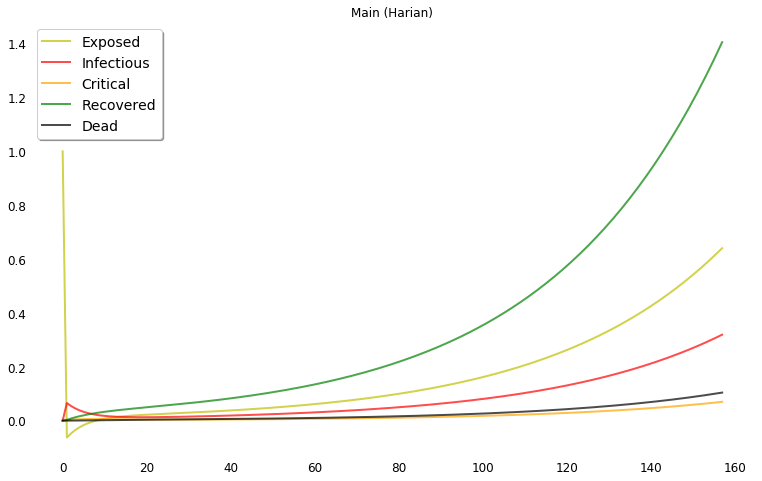

In [22]:
plotter.plot(plotter.plot_daily_lite);

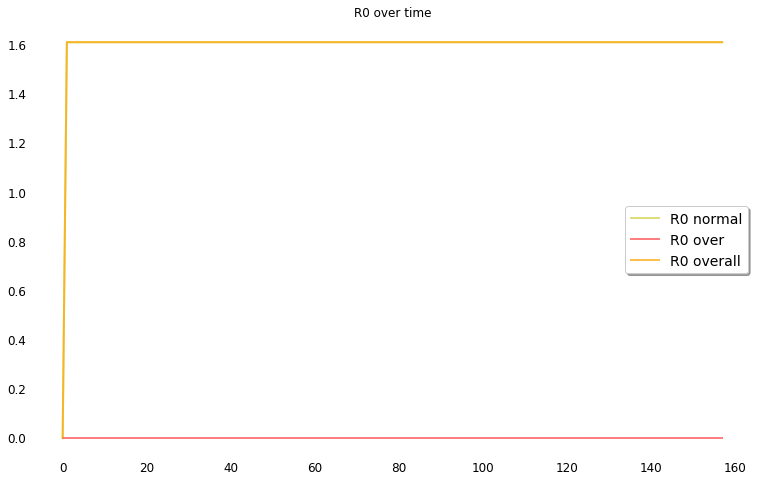

In [23]:
plotter.plot(plotter.plot_r0);

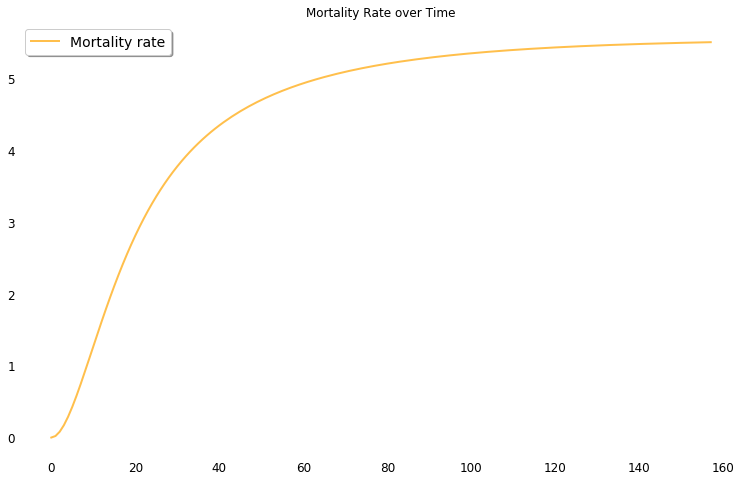

In [24]:
plotter.plot(plotter.plot_mortality_rate);

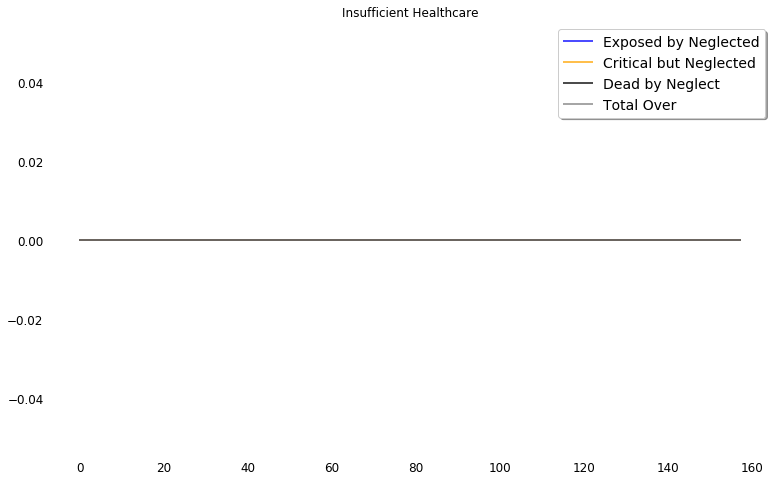

In [25]:
plotter.plot(plotter.plot_over);

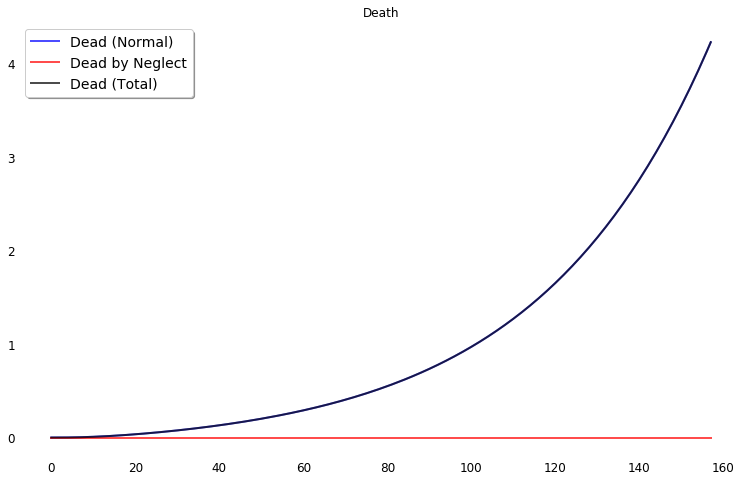

In [26]:
plotter.plot(plotter.plot_dead);

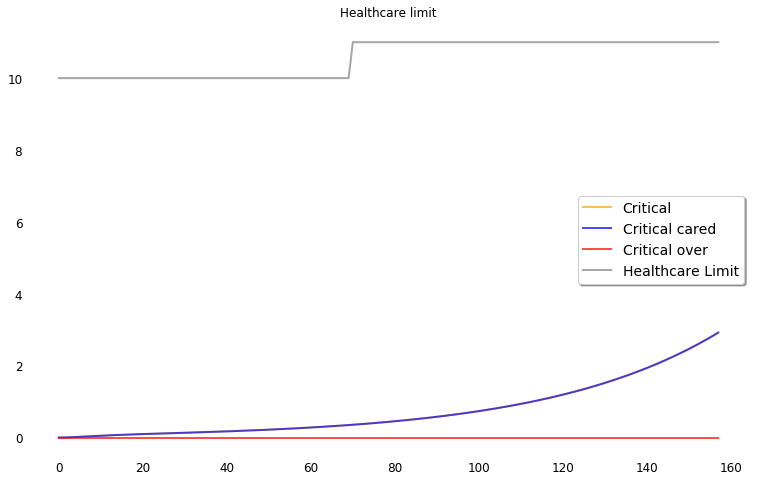

In [27]:
plotter.plot(plotter.plot_healthcare);

### Save Params

Run code below ONLY if you want to save the parameters.

In [28]:
ModelDataRepo.save_fitting_result(result)

### Confidence Interval

This requires standard error to be present for each params.

result.fit_result.conf_interval()